In [ ]:
# Make sure to upload Kaggle.json API Token!

# Download first set of pokemon data

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d vishalsubbiah/pokemon-images-and-types
!unzip pokemon-images-and-types.zip

In [ ]:
# Get names of Pokemon pictures

import os

names = os.listdir('images/images/')

names[:5]

['spiritomb.png',
 'reuniclus.png',
 'ivysaur.png',
 'sawsbuck.png',
 'simipour.png']

In [ ]:
# Get Pandas DataFrame with Name column and path to the image

import pandas as pd

names_df = pd.DataFrame({'Name':[x.split('.')[0] for x in names], 
                         'Path':['images/images/' + x for x in names]})

names_df

,Name,Path
0,spiritomb,images/images/spiritomb.png
1,reuniclus,images/images/reuniclus.png
2,ivysaur,images/images/ivysaur.png
3,sawsbuck,images/images/sawsbuck.png
4,simipour,images/images/simipour.png
...,...,...
804,spritzee,images/images/spritzee.png
805,scyther,images/images/scyther.png
806,registeel,images/images/registeel.png
807,palpitoad,images/images/palpitoad.png


In [ ]:
# Download bigger Pokemon.csv

!kaggle datasets download -d abcsds/pokemon
!unzip pokemon.zip

  0% 0.00/14.9k [00:00<?, ?B/s]
100% 14.9k/14.9k [00:00<00:00, 21.7MB/s]
Archive:  pokemon.zip
  inflating: Pokemon.csv             


In [ ]:
# Read in bigger Pokemon.csv

pokemon_df2 = pd.read_csv('Pokemon.csv')

pokemon_df2.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [ ]:
# Make name column lower-case to match with other table

pokemon_df2['Name'] = pokemon_df2['Name'].apply(lambda s: s.lower())

pokemon_df2

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,venusaurmega venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,dianciemega diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,hoopahoopa confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,hoopahoopa unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [ ]:
# Join the two pokemon dataframes on the name column

merged_df = pd.merge(left=names_df, right=pokemon_df2, on='Name', how='inner')

merged_df

,Name,Path,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,spiritomb,images/images/spiritomb.png,442,Ghost,Dark,485,50,92,108,92,108,35,4,False
1,reuniclus,images/images/reuniclus.png,579,Psychic,NaN,490,110,65,75,125,85,30,5,False
2,ivysaur,images/images/ivysaur.png,2,Grass,Poison,405,60,62,63,80,80,60,1,False
3,sawsbuck,images/images/sawsbuck.png,586,Normal,Grass,475,80,100,70,60,70,95,5,False
4,simipour,images/images/simipour.png,516,Water,NaN,498,75,98,63,98,63,101,5,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,spritzee,images/images/spritzee.png,682,Fairy,NaN,341,78,52,60,63,65,23,6,False
694,scyther,images/images/scyther.png,123,Bug,Flying,500,70,110,80,55,80,105,1,False
695,registeel,images/images/registeel.png,379,Steel,NaN,580,80,75,150,75,150,50,3,True
696,palpitoad,images/images/palpitoad.png,536,Water,Ground,384,75,65,55,65,55,69,5,False


In [ ]:
# Drop unneccessary columns

merged_df = merged_df.drop(['#', 'Type 1', 'Type 2', 'Total',
                              'Generation', 'Legendary'], axis=1)

merged_df.head()

,Name,Path,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,spiritomb,images/images/spiritomb.png,50,92,108,92,108,35
1,reuniclus,images/images/reuniclus.png,110,65,75,125,85,30
2,ivysaur,images/images/ivysaur.png,60,62,63,80,80,60
3,sawsbuck,images/images/sawsbuck.png,80,100,70,60,70,95
4,simipour,images/images/simipour.png,75,98,63,98,63,101


In [ ]:
len(merged_df)

698

In [ ]:
# Store Data in Compressed NumPy array files (.NPZs)

import numpy as np
import cv2

npz_paths = []

for i, row in merged_df.iterrows():
  picture_path = row['Path']

  npz_path = picture_path.split('.')[0] + '.npz'
  npz_paths.append(npz_path)

  pic_bgr_arr = cv2.imread(picture_path)
  pic_rgb_arr = cv2.cvtColor(pic_bgr_arr, cv2.COLOR_BGR2RGB)

  atk, deff         = row['Attack'], row['Defense']
  spatk, spdef, spd = row['Sp. Atk'], row['Sp. Def'], row['Speed']

  stats = np.array([atk, deff, spatk, spdef, spd])

  hp = row['HP']
  np.savez_compressed(npz_path, pic=pic_rgb_arr, stats=stats, hp=hp)

merged_df['NPZ_Path'] = pd.Series(npz_paths)

merged_df.head()

,Name,Path,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,NPZ_Path
0,spiritomb,images/images/spiritomb.png,50,92,108,92,108,35,images/images/spiritomb.npz
1,reuniclus,images/images/reuniclus.png,110,65,75,125,85,30,images/images/reuniclus.npz
2,ivysaur,images/images/ivysaur.png,60,62,63,80,80,60,images/images/ivysaur.npz
3,sawsbuck,images/images/sawsbuck.png,80,100,70,60,70,95,images/images/sawsbuck.npz
4,simipour,images/images/simipour.png,75,98,63,98,63,101,images/images/simipour.npz


In [ ]:
# Get DataFrame of Stats Only

stats_df = merged_df[['Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]

stats_df

,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,92,108,92,108,35
1,65,75,125,85,30
2,62,63,80,80,60
3,100,70,60,70,95
4,98,63,98,63,101
...,...,...,...,...,...
693,52,60,63,65,23
694,110,80,55,80,105
695,75,150,75,150,50
696,65,55,65,55,69


In [ ]:
# Calculate the mean of each column

means = [stats_df[col].mean() for col in stats_df]

means

[74.75501432664757,
 70.63896848137536,
 68.11461318051576,
 68.79512893982807,
 65.1618911174785]

In [ ]:
# Calculate the Std. Deviation of each column

std_devs = [stats_df[col].std() for col in stats_df]

std_devs

[28.761750950152354,
 29.333314802925987,
 28.295196091794672,
 26.812107359537972,
 27.080588226355086]

In [ ]:
# Create TensorFlow preprocessing function for stats stream

import tensorflow as tf

def stat_scaler(tensor):
  return (tensor - means) / std_devs

stat_scaler(tf.constant([2, 3, 4, 5, 6], dtype=tf.float32))

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([-2.529575 , -2.3058753, -2.2659187, -2.3793404, -2.1846604],
      dtype=float32)>

In [ ]:
# Load example pic and stats from Abomasnow NPZ

abomasnow_npz = np.load('images/images/abomasnow.npz')

abomasnow_npz['pic'].shape, abomasnow_npz['stats'].shape

((120, 120, 3), (5,))

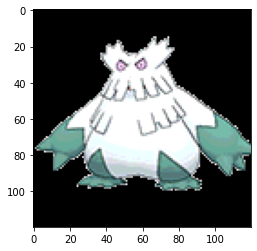

In [ ]:
# Display the example image

import matplotlib.pyplot as plt

plt.imshow(abomasnow_npz['pic'])

In [ ]:
# Drop stats columns (other than health), and original image, since we have that stored in the image

merged_df.drop(['Path', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'], inplace=True, axis=1)

merged_df

,Name,HP,NPZ_Path
0,spiritomb,50,images/images/spiritomb.npz
1,reuniclus,110,images/images/reuniclus.npz
2,ivysaur,60,images/images/ivysaur.npz
3,sawsbuck,80,images/images/sawsbuck.npz
4,simipour,75,images/images/simipour.npz
...,...,...,...
693,spritzee,78,images/images/spritzee.npz
694,scyther,70,images/images/scyther.npz
695,registeel,80,images/images/registeel.npz
696,palpitoad,75,images/images/palpitoad.npz


In [ ]:
# Shuffle the DataFrame, and split into train, validation and test sets

shuffled_df = merged_df.sample(frac=1)

train_df, val_df, test_df = shuffled_df[:500], shuffled_df[500:600], shuffled_df[600:]

In [ ]:
# Display train_df

train_df

,Name,HP,NPZ_Path
156,shedinja,1,images/images/shedinja.npz
691,sceptile,70,images/images/sceptile.npz
187,tyrunt,58,images/images/tyrunt.npz
128,bellossom,75,images/images/bellossom.npz
147,gligar,65,images/images/gligar.npz
...,...,...,...
117,tentacruel,80,images/images/tentacruel.npz
462,archeops,75,images/images/archeops.npz
382,shiftry,90,images/images/shiftry.npz
225,beedrill,65,images/images/beedrill.npz


In [ ]:
# Create function to get X_pic, X_stats, and y from a DataFrame

def get_X_y(df):

  X_pic, X_stats = [], []
  y = []

  for name in df['NPZ_Path']:
    loaded_npz = np.load(name)

    pic = loaded_npz['pic']
    X_pic.append(pic)

    stats = loaded_npz['stats']
    X_stats.append(stats)
    
    y.append(loaded_npz['hp'])

  X_pic, X_stats = np.array(X_pic), np.array(X_stats)
  y = np.array(y)

  return (X_pic, X_stats), y

(X_train_pic, X_train_stats), y_train = get_X_y(train_df)


# Get the training data

(X_train_pic.shape, X_train_stats.shape), y_train.shape

(((500, 120, 120, 3), (500, 5)), (500,))

In [ ]:
# Get the val data

(X_val_pic, X_val_stats), y_val = get_X_y(val_df)

(X_val_pic.shape, X_val_stats.shape), y_val.shape

(((100, 120, 120, 3), (100, 5)), (100,))

In [ ]:
# Get the test data

(X_test_pic, X_test_stats), y_test = get_X_y(test_df)

(X_test_pic.shape, X_test_stats.shape), y_test.shape

(((98, 120, 120, 3), (98, 5)), (98,))

In [ ]:
# Define the Model

from tensorflow.keras import layers
from tensorflow.keras.models import Model

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Define the Picture (CNN) Stream

input_pic = layers.Input(shape=(120, 120, 3))
x         = layers.Lambda(preprocess_input)(input_pic)
x         = MobileNetV2(input_shape=((120, 120, 3)), include_top=False)(x)
x         = layers.GlobalAveragePooling2D()(x)
x         = layers.Dense(10, activation='relu')(x)
x         = Model(inputs=input_pic, outputs=x)


# Define the Stats (Feed-Forward) Stream

input_stats = layers.Input(shape=(5,))
y = layers.Lambda(stat_scaler)(input_stats)
y = layers.Dense(64, activation="relu")(y)
y = layers.Dense(10, activation="relu")(y)
y = Model(inputs=input_stats, outputs=y)


# Concatenate the two streams together
combined = layers.concatenate([x.output, y.output])

# Define joined Feed-Forward Layer
z = layers.Dense(4, activation="relu")(combined)

# Define output node of 1 linear neuron (regression task)
z = layers.Dense(1, activation="linear")(z)


# Define the final model
model = Model(inputs=[x.input, y.input], outputs=z)

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
# Observe a (confusing) summary of the model

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda (Lambda)                (None, 120, 120, 3)  0           ['input_1[0][0]']                
                                                                                                  
 input_3 (InputLayer)           [(None, 5)]          0           []                               
                                                                                                  
 mobilenetv2_1.00_224 (Function  (None, 4, 4, 1280)  2257984     ['lambda[0][0]']           

In [ ]:
# Compile the model with Adam optimizer and mean-squared-error loss function

from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)

model.compile(loss='mse', optimizer=optimizer, metrics=['mean_absolute_error'])

In [ ]:
# Create a model saving callback and train for 10 epochs (connect to GPU runtime!!)

from tensorflow.keras.callbacks import ModelCheckpoint

cp = ModelCheckpoint('model/', save_best_only=True)

model.fit(x=[X_train_pic, X_train_stats], y=y_train, validation_data=([X_val_pic, X_val_stats], y_val), epochs=10, callbacks=[cp])

Epoch 1/10
16/16 [==============================] - ETA: 0s - loss: 4415.2012 - mean_absolute_error: 61.4913INFO:tensorflow:Assets written to: model/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


16/16 [==============================] - 70s 4s/step - loss: 4415.2012 - mean_absolute_error: 61.4913 - val_loss: 5445.6680 - val_mean_absolute_error: 70.3147
Epoch 2/10
16/16 [==============================] - ETA: 0s - loss: 2782.7537 - mean_absolute_error: 46.4899INFO:tensorflow:Assets written to: model/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


16/16 [==============================] - 58s 4s/step - loss: 2782.7537 - mean_absolute_error: 46.4899 - val_loss: 3075.0862 - val_mean_absolute_error: 48.6072


/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 3/10
16/16 [==============================] - ETA: 0s - loss: 1379.0929 - mean_absolute_error: 30.9552INFO:tensorflow:Assets written to: model/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


16/16 [==============================] - 34s 2s/step - loss: 1379.0929 - mean_absolute_error: 30.9552 - val_loss: 1165.6396 - val_mean_absolute_error: 27.5926


/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 4/10
16/16 [==============================] - ETA: 0s - loss: 386.2798 - mean_absolute_error: 14.5734INFO:tensorflow:Assets written to: model/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


16/16 [==============================] - 36s 2s/step - loss: 386.2798 - mean_absolute_error: 14.5734 - val_loss: 572.3871 - val_mean_absolute_error: 18.5248


/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 5/10
16/16 [==============================] - 2s 130ms/step - loss: 217.7825 - mean_absolute_error: 10.9586 - val_loss: 2371.5625 - val_mean_absolute_error: 36.1164
Epoch 6/10
16/16 [==============================] - 2s 126ms/step - loss: 162.2203 - mean_absolute_error: 9.3751 - val_loss: 718.1803 - val_mean_absolute_error: 21.9716
Epoch 7/10
16/16 [==============================] - 2s 125ms/step - loss: 112.8400 - mean_absolute_error: 7.4689 - val_loss: 1347.8640 - val_mean_absolute_error: 30.5091
Epoch 8/10
16/16 [==============================] - 2s 125ms/step - loss: 87.7812 - mean_absolute_error: 6.5608 - val_loss: 619.4116 - val_mean_absolute_error: 19.9546
Epoch 9/10
16/16 [==============================] - 2s 128ms/step - loss: 79.5669 - mean_absolute_error: 6.5340 - val_loss: 3466.8787 - val_mean_absolute_error: 45.1647
Epoch 10/10
16/16 [==============================] - 2s 127ms/step - loss: 96.4319 - mean_absolute_error: 7.2158 - val_loss: 6810.8218 - val_mean_absolut

In [ ]:
# Load the saved model

from tensorflow.keras.models import load_model

loaded_model = load_model('model/')

In [ ]:
# Use the loaded model to obtain predictions on the test set

test_predictions = loaded_model.predict([X_test_pic, X_test_stats]).flatten()

test_predictions.shape

(98,)

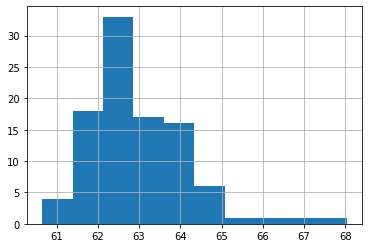

In [ ]:
# Convert predictions to a Pandas Series and view histogram
# Notice the model overfits!

test_preds_series = pd.Series(test_predictions)

test_preds_series.hist()

In [ ]:
test_df.head()

,Name,HP,NPZ_Path,Predicted HP
0,bidoof,59,images/images/bidoof.npz,62.435173
1,honedge,45,images/images/honedge.npz,62.893925
2,wartortle,59,images/images/wartortle.npz,62.215462
3,woobat,55,images/images/woobat.npz,62.462276
4,starmie,60,images/images/starmie.npz,62.073742


In [ ]:
# Reset index column, and add predictions to the test_df

test_df.reset_index(drop=True, inplace=True)

test_df['Predicted HP'] = test_preds_series

test_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Name,HP,NPZ_Path,Predicted HP
0,bidoof,59,images/images/bidoof.npz,62.435173
1,honedge,45,images/images/honedge.npz,62.893925
2,wartortle,59,images/images/wartortle.npz,62.215462
3,woobat,55,images/images/woobat.npz,62.462276
4,starmie,60,images/images/starmie.npz,62.073742
...,...,...,...,...
93,mamoswine,110,images/images/mamoswine.npz,67.058029
94,latios,80,images/images/latios.npz,62.587009
95,squirtle,44,images/images/squirtle.npz,61.739197
96,klefki,57,images/images/klefki.npz,62.837898


In [ ]:
# Compare results to linear regression on stats-only from scikit-learn

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

linear_model = LinearRegression().fit(X_train_stats, y_train)

mean_absolute_error(y_test, linear_model.predict(X_test_stats))

13.758705351247949

In [ ]:
# Add predictions from linear model to the test dataframe

test_df['Linear Predicted HP'] = pd.Series(linear_model.predict(X_test_stats))

test_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Name,HP,NPZ_Path,Predicted HP,Linear Predicted HP
0,bidoof,59,images/images/bidoof.npz,62.435173,50.978119
1,honedge,45,images/images/honedge.npz,62.893925,53.272027
2,wartortle,59,images/images/wartortle.npz,62.215462,66.413369
3,woobat,55,images/images/woobat.npz,62.462276,51.185318
4,starmie,60,images/images/starmie.npz,62.073742,72.051610
...,...,...,...,...,...
93,mamoswine,110,images/images/mamoswine.npz,67.058029,80.820710
94,latios,80,images/images/latios.npz,62.587009,91.289275
95,squirtle,44,images/images/squirtle.npz,61.739197,57.419789
96,klefki,57,images/images/klefki.npz,62.837898,73.650267
